In [1]:
import xarray as xr
import zipfile
import os
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

path = os.getcwd()

In [2]:
#unzip function
def unzip(z_file, model):
    with zipfile.ZipFile(z_file, 'r') as zip_ref:
        zip_ref.extractall(model)
        print('Done with '+model+' model')
        
        
#standardization formula
def stand(x, dim):
    return (x-x.mean(dim))/x.std(dim)

##################################################################################

############            MAIN CODE
--
##################################################################################


In [3]:
models = ['access_cm2','bcc_csm2_mr','cesm2_fv2','cesm2_waccm_fv2','cmcc_cm2_hr4','cmcc_esm2','cnrm_cm6_1_hr',
'ec_earth3_aerchem','fgoals_f3_l','hadgem3_gc31_ll','iitm_esm','inm_cm5_0','ipsl_cm6a_lr','kiost_esm','miroc6',
'miroc_es2l','mpi_esm1_2_hr','mri_esm2_0','norcpm1','noresm2_mm','taiesm1',
'access_esm1_5','awi_esm_1_1_lr','bcc_esm1','canesm5','cesm2','cesm2_waccm','cmcc_cm2_sr5',
'cnrm_cm6_1','cnrm_esm2_1','ec_earth3_cc','ec_earth3_veg_lr','fgoals_g3','gfdl_esm4','hadgem3_gc31_mm','inm_cm4_8',
'ipsl_cm5a2_inca','kace_1_0_g','mpi_esm1_2_lr','nesm3','sam0_unicon','ukesm1_0_ll']

In [4]:
file

NameError: name 'file' is not defined

Done with access_cm2 model
Done with access_esm1_5 model
Done with awi_esm_1_1_lr model
Done with bcc_csm2_mr model
Done with bcc_esm1 model
Done with canesm5 model
Done with cesm2 model
Done with cesm2_fv2 model
Done with cesm2_waccm model
Done with cesm2_waccm_fv2 model
Done with cmcc_cm2_hr4 model
Done with cmcc_cm2_sr5 model
Done with cmcc_esm2 model
Done with cnrm_cm6_1 model
Done with cnrm_cm6_1_hr model
Done with cnrm_esm2_1 model
Done with ec_earth3_aerchem model
Done with ec_earth3_cc model
Done with ec_earth3_veg_lr model
Done with fgoals_f3_l model
Done with fgoals_g3 model
Done with gfdl_esm4 model
Done with hadgem3_gc31_ll model
Done with hadgem3_gc31_mm model
Done with iitm_esm model
Done with inm_cm4_8 model
Done with inm_cm5_0 model
Done with ipsl_cm5a2_inca model
Done with ipsl_cm6a_lr model
Done with kace_1_0_g model
Done with kiost_esm model
Done with miroc6 model
Done with miroc_es2l model
Done with mpi_esm1_2_hr model
Done with mpi_esm1_2_lr model
Done with mri_esm

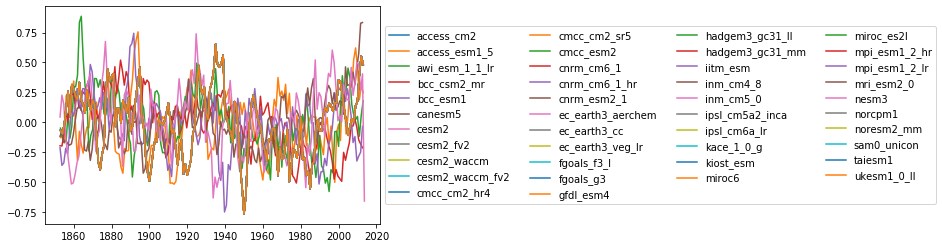

In [55]:
fig = plt.figure()
ax = plt.subplot(111)
for model in sorted(models):
    file = glob.glob(os.path.join(path,'*'+model+'*.zip'))[0]
    unzip(file, model)
    
    data_file = glob.glob(os.path.join(path,model+'/pr*.nc'))[-1]
    da_data = xr.open_dataset(data_file)
    da_RR = da_data.pr * 86400   #convert rainfall from kg m-2 s-1 to mm/day
    
    da_RR_Yr = da_RR.resample(time="Y").mean('time')
    da_RR_std = stand(da_RR_Yr, dim='time')
    da_std_fin = da_RR_std.mean(['lat','lon']).rolling(time=5, center=True).mean('time')
    plt.plot(da_std_fin.time, da_std_fin, label=model)
   
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)